In [1]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, \
  Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("goodreads_reviews_dedup.json", lines=True)
df.head()


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,24375664,5cd416f3efc3f944fce4ce2db2290d5e,5,Mind blowingly cool. Best science fiction I've...,Fri Aug 25 13:55:02 -0700 2017,Mon Oct 09 08:55:59 -0700 2017,Sat Oct 07 00:00:00 -0700 2017,Sat Aug 26 00:00:00 -0700 2017,16,0
1,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
2,8842281e1d1347389f2ab93d60773d4d,6392944,5e212a62bced17b4dbe41150e5bb9037,3,I haven't read a fun mystery book in a while a...,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,Mon Jul 24 00:00:00 -0700 2017,6,0
3,8842281e1d1347389f2ab93d60773d4d,22078596,fdd13cad0695656be99828cd75d6eb73,4,"Fun, fast paced, and disturbing tale of murder...",Mon Jul 24 02:33:09 -0700 2017,Sun Jul 30 10:23:54 -0700 2017,Sun Jul 30 15:42:05 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,22,4
4,8842281e1d1347389f2ab93d60773d4d,6644782,bd0df91c9d918c0e433b9ab3a9a5c451,4,A fun book that gives you a sense of living in...,Mon Jul 24 02:28:14 -0700 2017,Thu Aug 24 00:07:20 -0700 2017,Sat Aug 05 00:00:00 -0700 2017,Sun Jul 30 00:00:00 -0700 2017,8,0


In [3]:
df.user_id = pd.Categorical(df.user_id)
df['new_user_id'] = df.user_id.cat.codes
df.book_id = pd.Categorical(df.book_id)
df['new_book_id'] = df.book_id.cat.codes
user_ids = df['new_user_id'].values
book_ids = df['new_book_id'].values
ratings = df['rating'].values

In [4]:
N = len(set(user_ids))
M = len(set(book_ids))
K = 10

In [6]:
u = Input(shape=(1, ))
m = Input(shape=(1,))
u_emb = Embedding(N, K)(u)
m_emb = Embedding(M, K)(m)
u_emb = Flatten()(u_emb)
m_emb = Flatten()(m_emb)
x = Concatenate()([u_emb, m_emb])
x = Dense(460, activation='relu')(x)
x = Dense(460, activation='relu')(x)
x = Dense(1)(x)

In [9]:
model = Model(inputs=[u, m], outputs=x)
model.compile(loss='mse',
              optimizer=SGD(learning_rate=0.07,
                            momentum=0.9),
             )

In [11]:
user_ids, book_ids, ratings = shuffle(user_ids, book_ids, ratings)
NTrain = int(0.75*len(ratings))
train_user = user_ids[:NTrain]
train_book = book_ids[:NTrain]
train_ratings = ratings[:NTrain]

test_user = user_ids[NTrain:]
test_book = book_ids[NTrain:]
test_ratings = ratings[NTrain:]

In [14]:
avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating
r = model.fit(
    x=[train_user, train_book],
              y = train_ratings,
              epochs = 30,
              batch_size=1024,
              verbose=2,
              validation_data=([test_user, test_book], test_ratings,)
             )

Epoch 1/30
11529/11529 - 588s - 51ms/step - loss: 1.1241 - val_loss: 14.8653
Epoch 2/30
11529/11529 - 594s - 51ms/step - loss: 1.0720 - val_loss: 15.1840
Epoch 3/30
11529/11529 - 570s - 49ms/step - loss: 1.0214 - val_loss: 15.6330
Epoch 4/30
11529/11529 - 565s - 49ms/step - loss: 0.9675 - val_loss: 15.6596
Epoch 5/30
11529/11529 - 565s - 49ms/step - loss: 0.9141 - val_loss: 15.5232
Epoch 6/30
11529/11529 - 560s - 49ms/step - loss: 0.8656 - val_loss: 15.2970
Epoch 7/30
11529/11529 - 561s - 49ms/step - loss: 0.8238 - val_loss: 15.3395
Epoch 8/30
11529/11529 - 570s - 49ms/step - loss: 0.7858 - val_loss: 15.0956
Epoch 9/30
11529/11529 - 590s - 51ms/step - loss: 0.7494 - val_loss: 15.4975
Epoch 10/30
11529/11529 - 601s - 52ms/step - loss: 0.7153 - val_loss: 15.0819
Epoch 11/30
11529/11529 - 613s - 53ms/step - loss: 0.6831 - val_loss: 15.6860
Epoch 12/30
11529/11529 - 595s - 52ms/step - loss: 0.6532 - val_loss: 15.0724
Epoch 13/30
11529/11529 - 589s - 51ms/step - loss: 0.6253 - val_loss: 15.

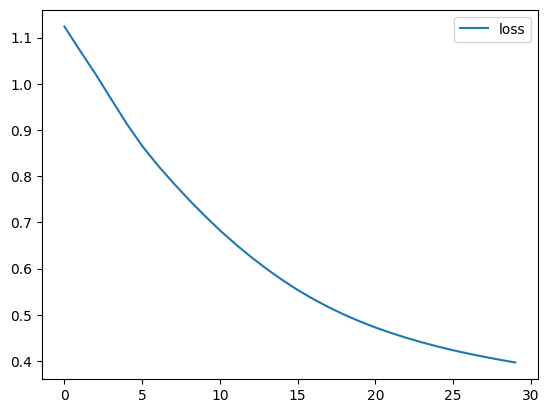

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.legend();